In [3]:
# import pandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2, os

# Load in the data
data = pd.read_csv('../../../driving_log_2020_oct_26.csv',names=['center', 'left', 'right', 'steering', 'throttle', 'reverse', 'speed'])

In [4]:
X = data[['center', 'left', 'right']].values

In [5]:
X.shape

(447, 3)

In [6]:
IMAGE_HEIGHT, IMAGE_WIDTH, IMAGE_CHANNELS = 160, 320, 3
INPUT_SHAPE = (IMAGE_HEIGHT, IMAGE_WIDTH, IMAGE_CHANNELS)

In [7]:
# From 
def load_image(data_dir, image_file):
    """
    Load RGB images from a file
    """
    return mpimg.imread(os.path.join(data_dir+image_file.strip()))

In [42]:
# Display Simulation Images
def view_car_position(image_num):
    # File path for each of the three cameras
    data_dir_c = X[image_num][0][:-28]
    data_dir_l = X[image_num][1][:-28]
    data_dir_r = X[image_num][2][:-28]

    # Load the images
    image_file = X[image_num][0][-28:]

    test_image_c = load_image(data_dir_c, image_file)
    test_image_l = load_image(data_dir_l, image_file)
    test_image_r = load_image(data_dir_r, image_file)
    print('Shape: (Height, Width, Channels)')
    print(f' Left:   {test_image_l.shape}\n',f'Center: {test_image_c.shape}\n', f'Right:  {test_image_r.shape}')
    
    # Show the images
    fig, (ax0, ax1 , ax2) = plt.subplots( nrows=1, ncols=3, sharey=True,  figsize=(20, 4) )

    # Plot params
    origin = 0
    width = IMAGE_WIDTH - 1 # Account for zero indexing
    height = IMAGE_HEIGHT - 1 # Account for zero indexing
    crop_top = height - 100 # 0 thru 59 croppped in training
    crop_btm = height - 25 #Last 25 rows cropped in training
    densely_dashdotdotted = (0, (3, 1, 1, 1, 1, 1))

    ax0.imshow(test_image_l);
    ax1.imshow(test_image_c);
    ax2.imshow(test_image_r);

    ax0.set( xlabel='Horizontal Pixels', title='Left Camera');
    ax1.set( xlabel='Horizontal Pixels', title='Center Camera (320 x 160 x 3)');
    ax2.set( xlabel='Horizontal Pixels', title='Right Camera');

    ax0.set( ylabel='Vertical Pixels', title='Left Camera');
    #ax1.set( ylabel='Vertical Pixels', title='Center Camera');
    #ax2.set( ylabel='Vertical Pixels', title='Right Camera');

    ax0.vlines(x=height, ymin=crop_btm, ymax=crop_top, colors='k', linestyles='--');
    ax0.hlines(y=crop_btm, xmin=origin, xmax=width, colors='b', linestyles='--');
    ax0.hlines(y=crop_top, xmin=origin, xmax=width, colors='r', linestyles=densely_dashdotdotted);

    ax1.vlines(x=height, ymin=crop_btm, ymax=crop_top, colors='k', linestyles='--');
    ax1.hlines(y=crop_btm, xmin=origin, xmax=width, colors='b', linestyles='--');
    ax1.hlines(y=crop_top, xmin=origin, xmax=width, colors='r', linestyles=densely_dashdotdotted);


    # crop(image) utils.py function removes the sky at the top and the car front at the bottom
    top =  'Top Crop: pixel #060'
    bttm = 'Bottom Crop: pixel #135'

    ax2.vlines(x=height, ymin=crop_btm, ymax=crop_top, colors='k', linestyles='--');
    ax2.hlines(y=crop_btm, xmin=origin, xmax=width, colors='b', linestyles='--', label=bttm);
    ax2.hlines(y=crop_top, xmin=origin, xmax=width, colors='r', linestyles=densely_dashdotdotted, label=top);

    #ax0.legend();
    #ax1.legend();
    ax2.legend();

![](https://developer.nvidia.com/blog/parallelforall/wp-content/uploads/2016/08/simulator-roberts-624x294.png)

Figure: Screenshot of NVIDIA Simulator, highlighted rectangle contains section of camera image used by the CNN

Shape: (Height, Width, Channels)
 Left:   (160, 320, 3)
 Center: (160, 320, 3)
 Right:  (160, 320, 3)


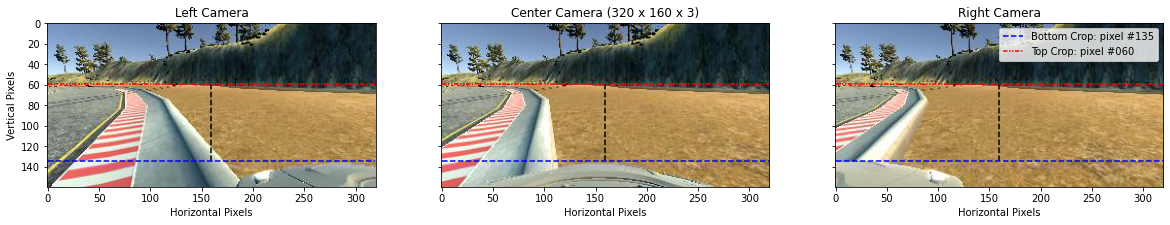

In [46]:
#EXAMPLE: Off-road right
image_num = 0
view_car_position(image_num)

Shape: (Height, Width, Channels)
 Left:   (160, 320, 3)
 Center: (160, 320, 3)
 Right:  (160, 320, 3)


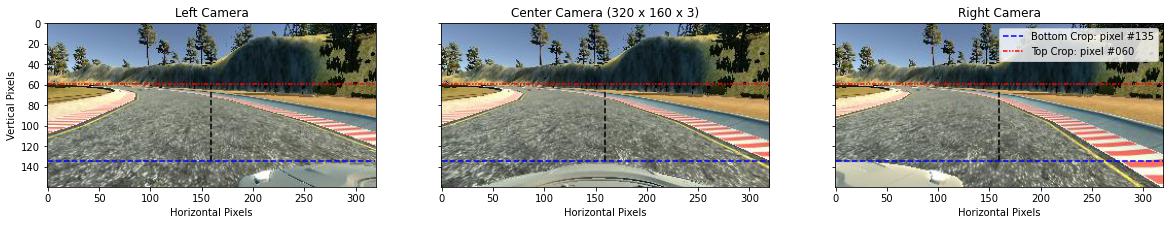

In [45]:
# EXAMPLE: Curved road
image_num = 20
view_car_position(image_num)

Shape: (Height, Width, Channels)
 Left:   (160, 320, 3)
 Center: (160, 320, 3)
 Right:  (160, 320, 3)


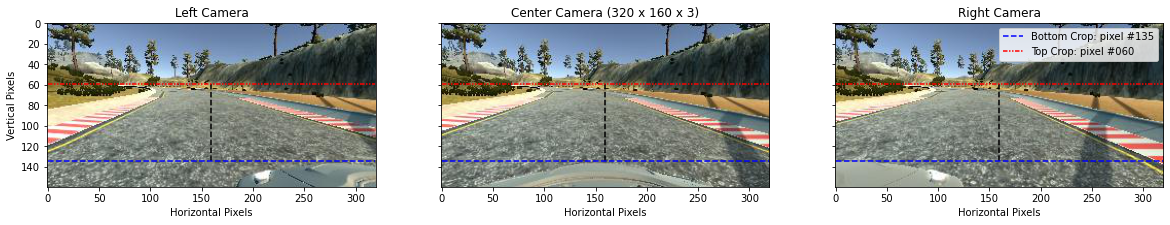

In [44]:
# EXAMPLE: Straight road
image_num = 80
view_car_position(image_num)

Shape: (Height, Width, Channels)
 Left:   (160, 320, 3)
 Center: (160, 320, 3)
 Right:  (160, 320, 3)


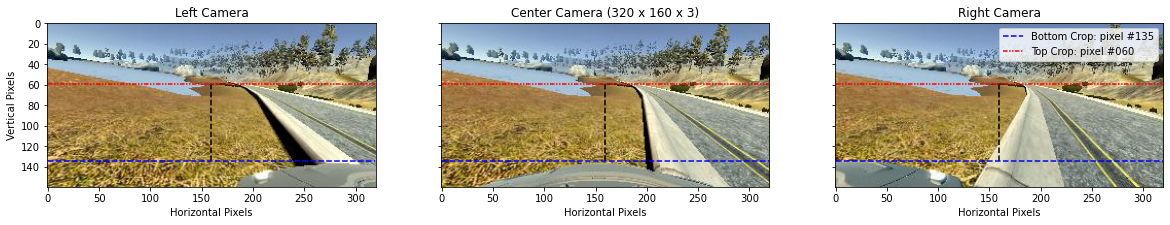

In [43]:
# EXAMPLE: off-road left
image_num = 220
view_car_position(image_num)